In [1]:
from math import tanh
import numpy as np
import scipy.stats as st 
import matplotlib.pyplot as plt 
import pandas as pd 
import plotly.express as px
import plotly.io as pio
from decimal import *
from decimal import Decimal
pio.renderers.default = "png"


getcontext().prec = 60

k_1 = Decimal(1523) / Decimal(2000)
k_2 = Decimal(3) / Decimal(4)
_c = Decimal(1.0)
_d = Decimal(1.0)

def a(S_r, b, c, d):
    return S_r - b * Decimal(tanh(c * d))

def b(S_r, F_bar):
    return (S_r - max(S_r - F_bar, 0)) / F_bar

def B(g, a, b, c, d):
    return a + b * Decimal(tanh(-c * (g - d)))

def B_equiv(g, S_r, b):

    _a = a(S_r, b, _c, _d)
    return B(g, _a, b, _c, _d)

def B_approx(g, S_r, b):
    return S_r - b * (k_1 - k_2 * (1 - g))

def F(credit_supply, space_pledged, history_size, min_replication_factor):
    return credit_supply / max((space_pledged/min_replication_factor - history_size), 1)

<img src="media/beta.png" height=200>

In [2]:
# N_YEARS = 4
# BLOCK_TIME_IN_SECONDS = 10
# BLOCKS_PER_DAY = 24 * 60 * 60 / BLOCK_TIME_IN_SECONDS
# BLOCKS_PER_YEAR = BLOCKS_PER_DAY * 365.25
# BLOCKS_PER_N_YEARS = BLOCKS_PER_YEAR * N_YEARS
# MAX_DISBURSAL_DURING_N_YEARS = 500_000_000 # 500 Million
# MAX_AVG_BLOCK_REWARD_DURING_N_YEARS = MAX_DISBURSAL_DURING_N_YEARS / BLOCKS_PER_N_YEARS
# MIN_DISBURSAL_DURING_N_YEARS = MAX_DISBURSAL_DURING_N_YEARS / 10
# MIN_AVG_BLOCK_REWARD_DURING_N_YEARS = MIN_DISBURSAL_DURING_N_YEARS / BLOCKS_PER_N_YEARS

KB = 2 ** (1 * 10)
MB = 2 ** (2 * 10)
GB = 2 ** (3 * 10)
TB = 2 ** (4 * 10)
PB = 2 ** (5 * 10)
EB = 2 ** (6 * 10)
ZB = 2 ** (7 * 10)
world_datasphere_size = 15 * ZB
max_credit_supply = 1_000_000_000
max_block_size = Decimal(3.75 * MB)

g = [Decimal(i) for i in np.linspace(0, 1, 21)]
S_r = [Decimal(i) for i in np.linspace(0, 200, 200)]
#_F = st.beta.rvs(a=1, b=1_000_000, size=300) * max_credit_supply
#_F = np.log(np.linspace(1.01, 10, 1000)) 


_F = [Decimal(10 ** -i) for i in range(-6, 12)]


data = []
for g_i in g:
    for S_r_i in S_r:
        for _f in _F:
            Fbar = _f * max_block_size
            _b = b(S_r_i, Fbar)
            reward_approx = B_approx(g_i, S_r_i, _b)
            reward_true = B_equiv(g_i, S_r_i, _b)
            reward_error = reward_true - reward_approx
            data.append(dict(g=g_i, 
                             S_r=S_r_i,
                             F=_f,
                             Fbar=Fbar, 
                             b=_b, 
                             B_approx=reward_approx, 
                             B_true=reward_true, 
                             B_error=reward_true-reward_approx,
                             B_rel_error=(reward_true-reward_approx)/reward_true if reward_true != 0.0 else None
                             ))

df = pd.DataFrame(data)

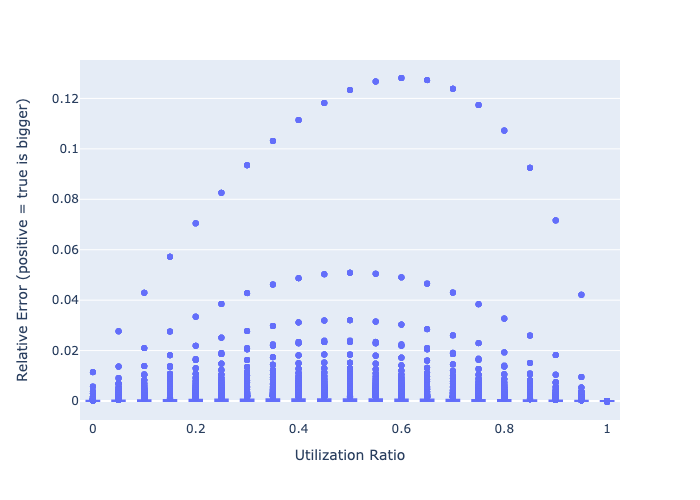

In [3]:
px.box(df, x='g', y='B_rel_error', labels={'g': 'Utilization Ratio', 'B_rel_error': 'Relative Error (positive = true is bigger)'})

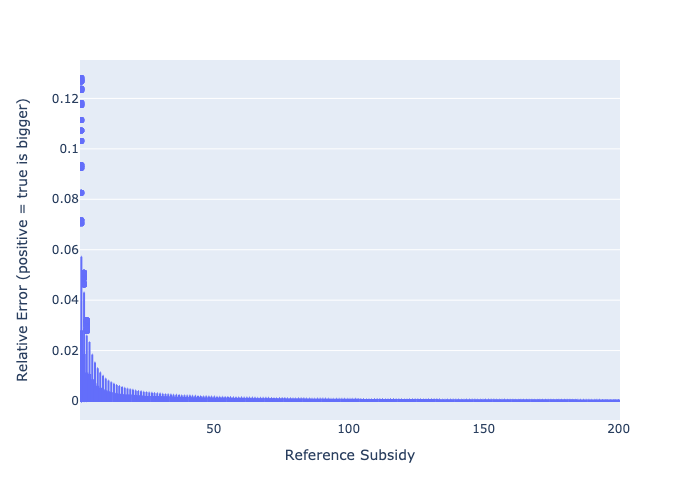

In [4]:
px.box(df, x='S_r', y='B_rel_error', labels={'S_r': 'Reference Subsidy', 'B_rel_error': 'Relative Error (positive = true is bigger)'})

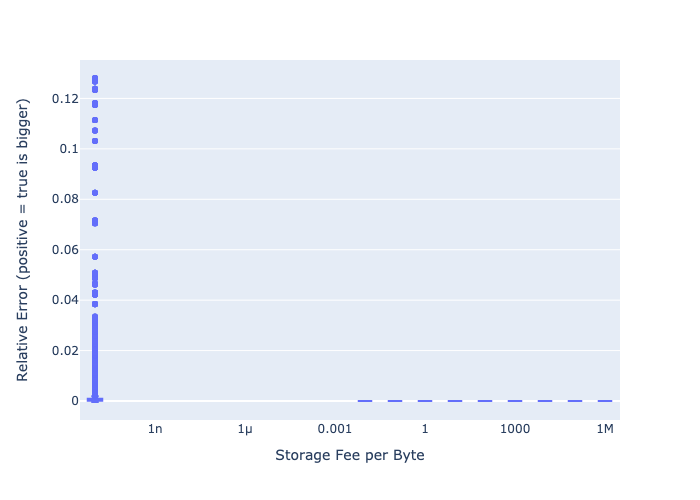

In [5]:
px.box(df, x='F', y='B_rel_error', log_x=True, labels={'F': 'Storage Fee per Byte', 'B_rel_error': 'Relative Error (positive = true is bigger)'})

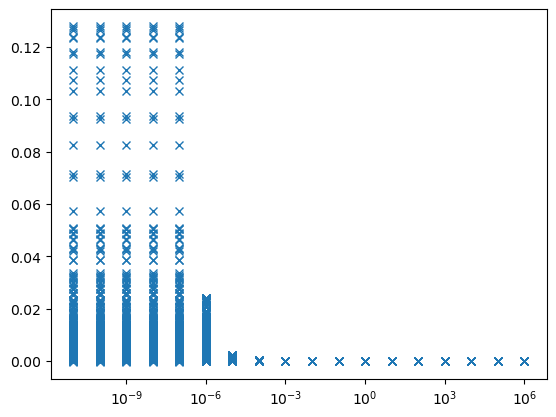

In [6]:
plt.plot(df.F, df.B_rel_error, 'x')
plt.xscale('log')
plt.show()

In [7]:
250_000_000 / (1 * PB)

2.220446049250313e-07